# 🌲 Modelo 4: Regresión con Random Forest

Este notebook implementa un modelo de regresión usando **Random Forest Regressor** para predecir el `impact_score` de los jugadores en Rainbow Six Siege.

## Características del modelo:
- **Algoritmo**: Random Forest Regressor
- **Variable objetivo**: impact_score
- **Ventajas**: Reduce overfitting, maneja datos categóricos y numéricos, robusto a outliers
- **Desventajas**: Menos interpretable que un árbol individual, mayor complejidad computacional

In [1]:
# 🌲 Modelo 4: Regresión con Random Forest

# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Cargar extensión de Kedro
%load_ext kedro.ipython

[10/17/25 17:00:23] INFO     Using                                                                  ]8;id=737769;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=768562;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\ke                
                             dro\framework\project\rich_logging.yml' as logging configuration.                     

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=666457;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=138764;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=302578;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=946098;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=905057;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=782645;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\proyecto-ml.                              
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/17/25 17:00:24] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=799672;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=624830;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/17/25 17:00:25] INFO     Kedro project proteyecto-ml                                            ]8;id=252584;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=681578;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=56937;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=875011;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=777593;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=600487;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

In [3]:
# Cargar los datos
data = catalog.load("data_final")

print("📊 Información del dataset:")
print(f"Shape: {data.shape}")
print(f"Columnas disponibles: {len(data.columns)}")
print("\n🎯 Variable objetivo: impact_score")
print(f"Estadísticas del target:")
print(data['impact_score'].describe())

[10/17/25 17:00:29] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=129432;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=977292;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

📊 Información del dataset:
Shape: (200873, 33)
Columnas disponibles: 33

🎯 Variable objetivo: impact_score
Estadísticas del target:
count    200873.000000
mean          0.371553
std           0.787608
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: impact_score, dtype: float64


## 🔧 Preparación de los datos

Para Random Forest, utilizaremos las mismas características que en el árbol de decisión individual, pero el ensemble de múltiples árboles debería proporcionar mejor generalización y reducir el overfitting.

In [4]:
## 🔧 PREPARACIÓN DE DATOS CON CODIFICACIÓN

print("🔧 PREPARANDO DATOS CON CODIFICACIÓN...")

# Preparar X e y
X = data[[ 
    'gamemode',        # tipo de partida
    'winrole',         # atacante o defensor
    'endroundreason',  # cómo terminó la ronda
    'roundduration',   # cuánto duró
    'isdead',          # si el jugador murió
    'nbkills',]]       # número de eliminaciones

y = data['impact_score']

# CODIFICAR variables categóricas (CRÍTICO para Random Forest)
label_encoders = {}
categorical_columns = ['gamemode', 'winrole', 'endroundreason']

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convertir a string por seguridad
    label_encoders[col] = le
    print(f"✅ {col} codificado: {len(le.classes_)} categorías")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 Datos preparados:")
print(f"   X_train: {X_train.shape}")
print(f"   X_test: {X_test.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   y_test: {y_test.shape}")

🔧 PREPARANDO DATOS CON CODIFICACIÓN...


[10/17/25 17:00:33] WARNING  C:\Users\nachi\AppData\Local\Temp\ipykernel_4308\2485152995.py:22:     ]8;id=672908;file://C:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=817449;file://C:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\warnings.py#112\112]8;;\
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc = value instead                                                        
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               X = le.fit_transform(X.astype(str))  # Convertir a string por                       
                             seguridad                                                                             
                                                                                                                   

✅ gamemode codificado: 3 categorías


[10/17/25 17:00:34] WARNING  C:\Users\nachi\AppData\Local\Temp\ipykernel_4308\2485152995.py:22:     ]8;id=694424;file://C:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=589927;file://C:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\warnings.py#112\112]8;;\
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc = value instead                                                        
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               X = le.fit_transform(X.astype(str))  # Convertir a string por                       
                             seguridad                                                                             
                                                                                                                   

✅ winrole codificado: 2 categorías


                    WARNING  C:\Users\nachi\AppData\Local\Temp\ipykernel_4308\2485152995.py:22:     ]8;id=127664;file://C:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=602144;file://C:\Users\nachi\AppData\Local\Programs\Python\Python312\Lib\warnings.py#112\112]8;;\
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc = value instead                                                        
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               X = le.fit_transform(X.astype(str))  # Convertir a string por                       
                             seguridad                                                                             
                                                                                                                   

✅ endroundreason codificado: 15 categorías

📊 Datos preparados:
   X_train: (160698, 6)
   X_test: (40175, 6)
   y_train: (160698,)
   y_test: (40175,)


In [5]:
## 🌲 MODELO RANDOM FOREST BASE

print("\n🚀 ENTRENANDO MODELO RANDOM FOREST BASE...")

model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("📈 RESULTADOS MODELO BASE:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


🚀 ENTRENANDO MODELO RANDOM FOREST BASE...
📈 RESULTADOS MODELO BASE:
MSE: 0.1254
MAE: 0.1568
RMSE: 0.3542
R²: 0.7945


In [6]:
## 🔍 OPTIMIZACIÓN CON GRID SEARCH

print("\n🎯 OPTIMIZANDO HIPERPARÁMETROS...")

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred_gs = best_model.predict(X_test)

mse_gs = mean_squared_error(y_test, y_pred_gs)
mae_gs = mean_absolute_error(y_test, y_pred_gs)
rmse_gs = np.sqrt(mse_gs)
r2_gs = r2_score(y_test, y_pred_gs)

print("✅ GridSearchCV completado.")


🎯 OPTIMIZANDO HIPERPARÁMETROS...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ GridSearchCV completado.


In [7]:
## 📊 RESULTADOS GRID SEARCH

print("\n🎯 MEJORES HIPERPARÁMETROS ENCONTRADOS:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 Mejor score validación cruzada: {grid_search.best_score_:.4f}")

print("\n📈 RESULTADOS MEJOR MODELO EN TEST:")
print(f"MSE: {mse_gs:.4f}")
print(f"MAE: {mae_gs:.4f}")
print(f"RMSE: {rmse_gs:.4f}")
print(f"R²: {r2_gs:.4f}")


🎯 MEJORES HIPERPARÁMETROS ENCONTRADOS:
  max_depth: 10
  min_samples_leaf: 5
  min_samples_split: 20
  n_estimators: 100

📊 Mejor score validación cruzada: 0.7925

📈 RESULTADOS MEJOR MODELO EN TEST:
MSE: 0.1253
MAE: 0.1565
RMSE: 0.3540
R²: 0.7948


In [8]:
## 🔍 COMPARACIÓN DE MODELOS

print("\n🔍 COMPARACIÓN: MODELO BASE vs OPTIMIZADO")
print("=" * 55)
print(f"{'Métrica':<12} {'Base':<12} {'Optimizado':<12} {'Mejora':<10}")
print("-" * 55)
print(f"{'R²':<12} {r2:.4f}      {r2_gs:.4f}       {r2_gs - r2:+.4f}")
print(f"{'MAE':<12} {mae:.4f}      {mae_gs:.4f}       {mae_gs - mae:+.4f}")
print(f"{'RMSE':<12} {rmse:.4f}      {rmse_gs:.4f}       {rmse_gs - rmse:+.4f}")

# Análisis de mejora
improvement = r2_gs - r2
if improvement > 0.01:
    print(f"\n✅ Excelente! GridSearch mejoró significativamente el modelo (+{improvement:.4f} R²)")
elif improvement > 0:
    print(f"\n⚠️  GridSearch mejoró ligeramente el modelo (+{improvement:.4f} R²)")
else:
    print(f"\n🔴 GridSearch no mejoró el modelo ({improvement:.4f} R²)")


🔍 COMPARACIÓN: MODELO BASE vs OPTIMIZADO
Métrica      Base         Optimizado   Mejora    
-------------------------------------------------------
R²           0.7945      0.7948       +0.0002
MAE          0.1568      0.1565       -0.0003
RMSE         0.3542      0.3540       -0.0002

⚠️  GridSearch mejoró ligeramente el modelo (+0.0002 R²)



📊 ANÁLISIS DE CARACTERÍSTICAS IMPORTANTES

🎯 TOP CARACTERÍSTICAS MÁS IMPORTANTES:
   Característica  Importancia
5         nbkills     0.780970
4          isdead     0.190385
3   roundduration     0.013808
2  endroundreason     0.011541
0        gamemode     0.001790
1         winrole     0.001506


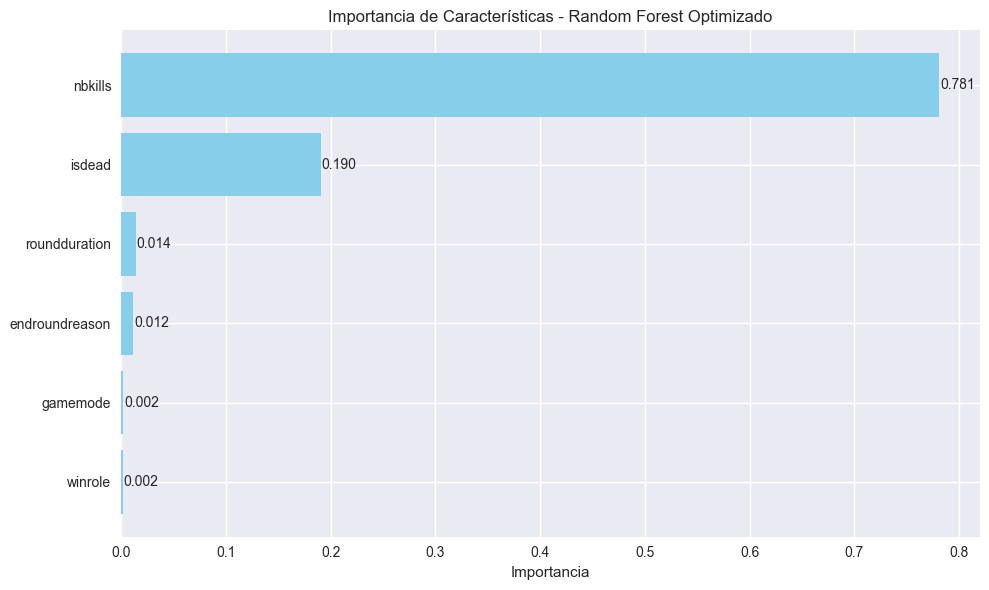


💡 La característica más importante es 'nbkills'
   con 0.781 de importancia (78.1%)


In [9]:
## 📊 ANÁLISIS DE FEATURE IMPORTANCE

print("\n📊 ANÁLISIS DE CARACTERÍSTICAS IMPORTANTES")

# Obtener importancia de características
importances = best_model.feature_importances_
feature_names = X.columns

# Crear DataFrame
feature_importance_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia': importances
}).sort_values('Importancia', ascending=False)

print("\n🎯 TOP CARACTERÍSTICAS MÁS IMPORTANTES:")
print(feature_importance_df)

# Gráfico
plt.figure(figsize=(10, 6))
bars = plt.barh(
    feature_importance_df['Característica'], 
    feature_importance_df['Importancia'],
    color='skyblue'
)
plt.xlabel('Importancia')
plt.title('Importancia de Características - Random Forest Optimizado')
plt.gca().invert_yaxis()

# Añadir valores
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Interpretación
most_important = feature_importance_df.iloc[0]
print(f"\n💡 La característica más importante es '{most_important['Característica']}'")
print(f"   con {most_important['Importancia']:.3f} de importancia ({most_important['Importancia']*100:.1f}%)")

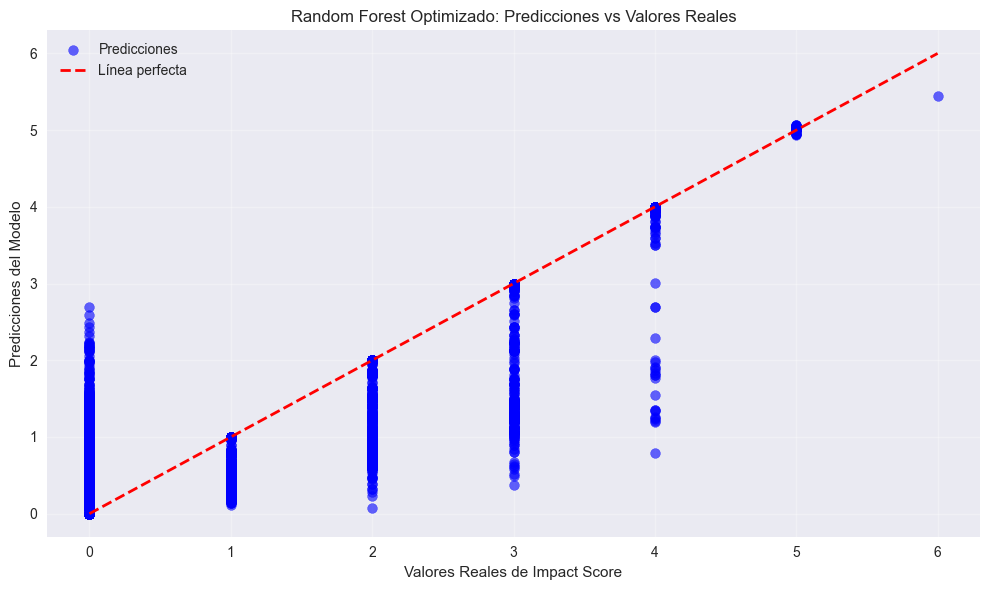


📊 Precisión: 74.3% de predicciones están dentro de ±0.078
   del valor real (10% de la desviación estándar)


In [ ]:
## 📈 GRÁFICO DE PREDICCIONES VS REALES

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gs, alpha=0.6, s=50, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Línea perfecta')
plt.xlabel('Valores Reales de Impact Score')
plt.ylabel('Predicciones del Modelo')
plt.title('Random Forest Optimizado: Predicciones vs Valores Reales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis de precisión
error_margin = 0.1 * y_test.std()
within_margin = np.abs(y_test - y_pred_gs) <= error_margin
accuracy_within_margin = within_margin.mean()

print(f"\n📊 Precisión: {accuracy_within_margin:.1%} de predicciones están dentro de ±{error_margin:.3f}")
print(f"   del valor real (10% de la desviación estándar)")     


In [11]:
## 🎯 RESUMEN FINAL

print("\n" + "="*60)
print("🎉 RESUMEN FINAL - RANDOM FOREST")
print("="*60)
print(f"✅ Mejor R² obtenido: {r2_gs:.4f}")
print(f"✅ Error RMSE: {rmse_gs:.4f}")
print(f"✅ Mejora con GridSearch: {r2_gs - r2:+.4f}")
print(f"✅ Característica más importante: {feature_importance_df.iloc[0]['Característica']}")
print("="*60)


🎉 RESUMEN FINAL - RANDOM FOREST
✅ Mejor R² obtenido: 0.7948
✅ Error RMSE: 0.3540
✅ Mejora con GridSearch: +0.0002
✅ Característica más importante: nbkills
